In [9]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import xgboost as xgb

In [10]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
def score(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

In [12]:

clf_bounded = DecisionTreeClassifier(max_depth=2)

11.1 ms ± 661 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


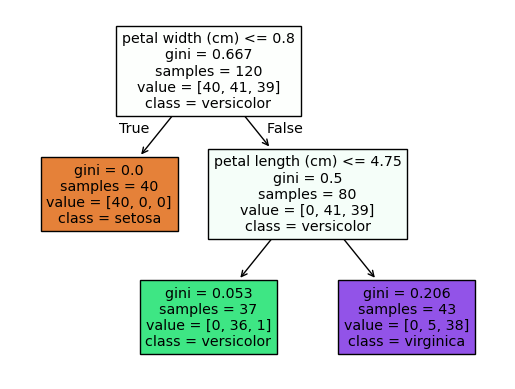

In [13]:
%%timeit -n 1000
clf_bounded.fit(X_train, y_train)
plot_tree(
    clf_bounded,
    filled=True,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
);

In [14]:
clf_unbounded = DecisionTreeClassifier()

18.9 ms ± 503 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


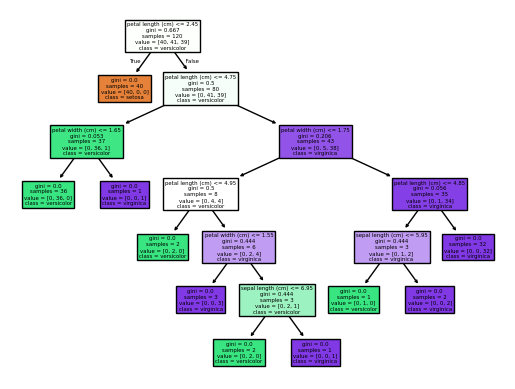

In [15]:
%%timeit -n 1000
clf_unbounded.fit(X_train, y_train)
plot_tree(
    clf_unbounded,
    filled=True,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
);


In [17]:
print("Bounded tree accuracy:", score(clf_bounded, X_test, y_test))
print("Unbounded tree accuracy:", score(clf_unbounded, X_test, y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Bounded tree accuracy: None
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Unbounded tree accuracy: None


In [19]:
forest = RandomForestClassifier(n_estimators=5)

In [20]:
%%timeit -n 100
forest.fit(X_train, y_train)

5.34 ms ± 189 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
print("Random forest accuracy:", score(forest, X_test, y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Random forest accuracy: None


Text(0.5, 1.0, 'Feature Importances in Random Forest')

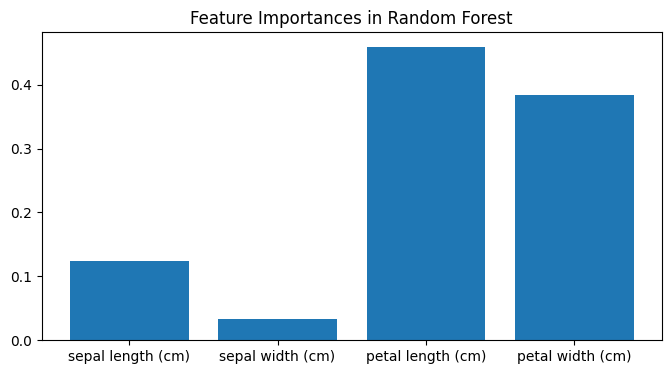

In [22]:
plt.figure(figsize=(8, 4))
plt.bar(iris.feature_names, forest.feature_importances_)
plt.title("Feature Importances in Random Forest")

Text(0, 0.5, 'Accuracy')

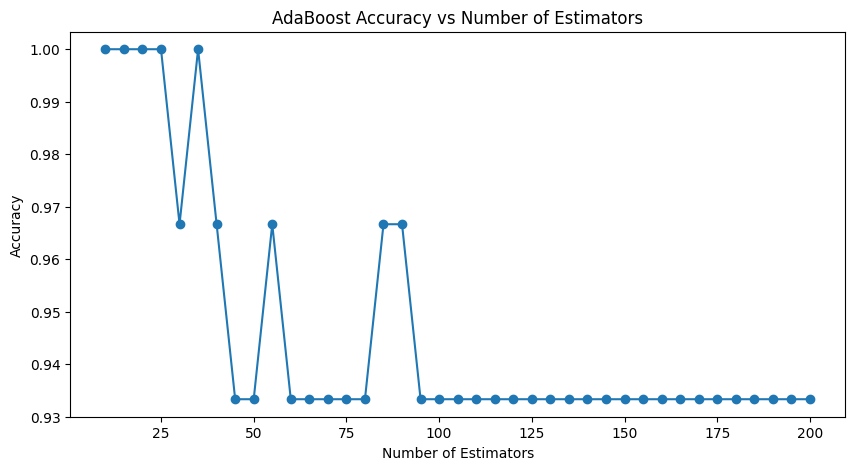

In [23]:
accuracy_list = []

est_count = range(10, 201, 5)

for est in est_count:
    ada = AdaBoostClassifier(n_estimators=est)
    ada.fit(X_train, y_train)
    accuracy_list.append(ada.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(est_count, accuracy_list, marker="o")
plt.title("AdaBoost Accuracy vs Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")

AdaBoost - Gradient Boosting with weighted answers based on correct classification


In [24]:
grad_boost = GradientBoostingClassifier(n_estimators=5)

In [26]:
%%timeit -n 100
grad_boost.fit(X_train, y_train)

9.44 ms ± 564 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
print("Gradient Boosting accuracy:", score(grad_boost, X_test, y_test))

Gradient Boosting accuracy: 1.0


Text(0.5, 1.0, 'Feature Importances in Random Forest')

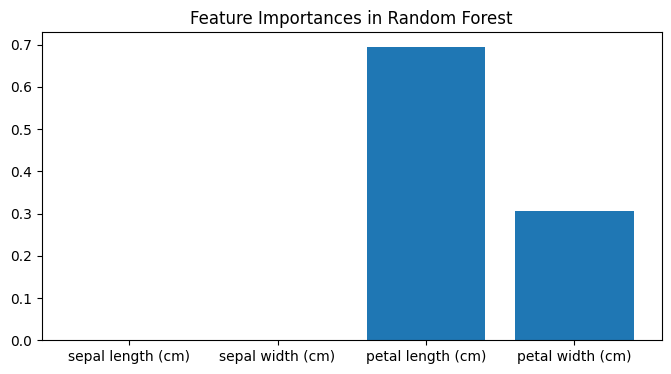

In [27]:
plt.figure(figsize=(8, 4))
plt.bar(iris.feature_names, grad_boost.feature_importances_)
plt.title("Feature Importances in Random Forest")

In [28]:
xgb_clf = xgb.XGBClassifier(n_estimators=5, eval_metric="mlogloss")

In [29]:
%%timeit -n 100
xgb_clf.fit(X_train, y_train)

23 ms ± 1.81 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [30]:
print("XGBoost accuracy:", score(xgb_clf, X_test, y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

XGBoost accuracy: None


Text(0.5, 1.0, 'Feature Importances in Gradient Boosting')

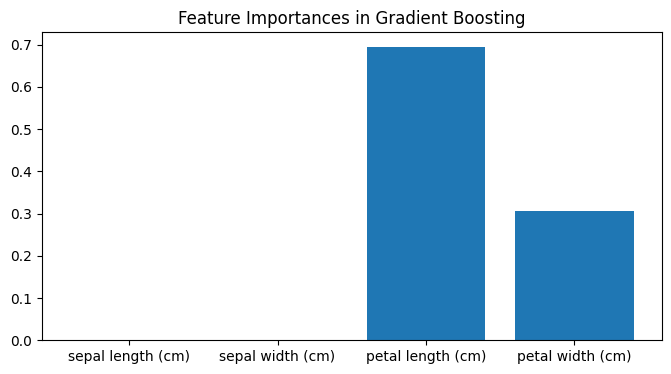

In [31]:
plt.figure(figsize=(8, 4))
plt.bar(iris.feature_names, grad_boost.feature_importances_)
plt.title("Feature Importances in Gradient Boosting")